In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # Install the Kaggle API
!pip install -q kaggle

In [ ]:
 # Make a directory named “.kaggle”
!mkdir -p ~/.kaggle

In [ ]:
 # Copy the “kaggle.json” into this new directory
!cp /content/drive/MyDrive/Datasets/kaggle.json ~/.kaggle/

In [ ]:
 # Allocate the required permission for this file
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arnaud58/landscape-pictures

 99% 612M/620M [00:05<00:00, 145MB/s]
100% 620M/620M [00:05<00:00, 121MB/s]


In [ ]:
 !unzip -q landscape-pictures.zip -d .

# 1. Data Citra

In [ ]:
import cv2
from matplotlib import pyplot as plt
from skimage import io
from PIL import Image

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2

import numpy as np
import os

## Import gambar dan tampilkan

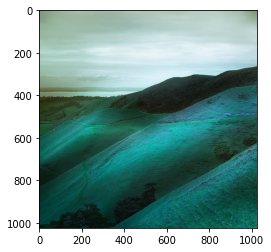

In [ ]:
img = cv2.imread('00000000.jpg')
plt.imshow(img)

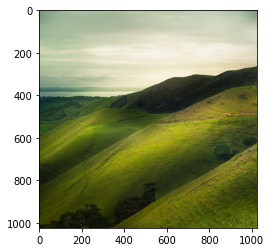

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

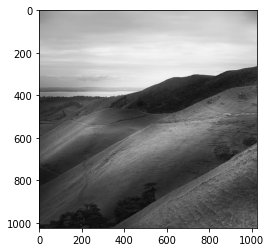

In [ ]:
img_grayscale_temp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_graysclae = cv2.cvtColor(img_grayscale_temp, cv2.COLOR_GRAY2RGB)
plt.imshow(img_graysclae)

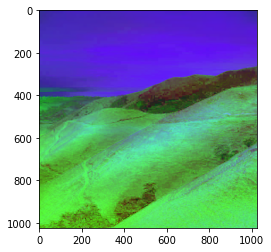

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)

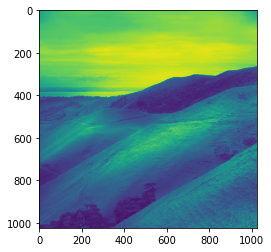

In [ ]:
r, g, b = cv2.split(img_rgb)
plt.imshow(g)

In [ ]:
img_array = img_to_array(img_rgb)
print(img_array)

[[[122. 150. 127.]
  [122. 150. 127.]
  [122. 150. 127.]
  ...
  [123. 148. 126.]
  [123. 148. 126.]
  [123. 148. 126.]]

 [[122. 150. 127.]
  [122. 150. 127.]
  [122. 150. 127.]
  ...
  [124. 149. 127.]
  [123. 148. 126.]
  [123. 148. 126.]]

 [[122. 150. 127.]
  [122. 150. 127.]
  [122. 150. 127.]
  ...
  [124. 149. 127.]
  [124. 149. 127.]
  [123. 148. 126.]]

 ...

 [[ 18.  23.   0.]
  [ 19.  24.   1.]
  [ 21.  26.   4.]
  ...
  [ 98. 112.   0.]
  [ 94. 108.   0.]
  [111. 125.  12.]]

 [[ 19.  25.   0.]
  [ 19.  24.   1.]
  [ 20.  25.   3.]
  ...
  [130. 143.  29.]
  [174. 187.  73.]
  [127. 140.  26.]]

 [[ 23.  29.   3.]
  [ 22.  28.   2.]
  [ 21.  26.   4.]
  ...
  [128. 141.  25.]
  [122. 135.  19.]
  [ 94. 107.   0.]]]


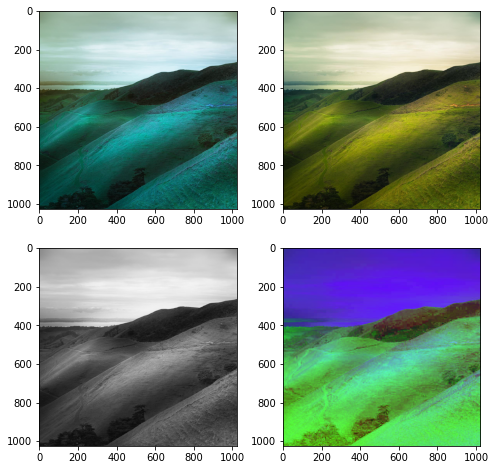

In [ ]:
fig = plt.figure(num=None, figsize=(8, 8))

ax = fig.add_subplot(2, 2, 1)
plt.imshow(img)

ax = fig.add_subplot(2, 2, 2)
plt.imshow(img_rgb)

ax = fig.add_subplot(2, 2, 3)
plt.imshow(img_graysclae)

ax = fig.add_subplot(2, 2, 4)
plt.imshow(img_hsv)

plt.show()

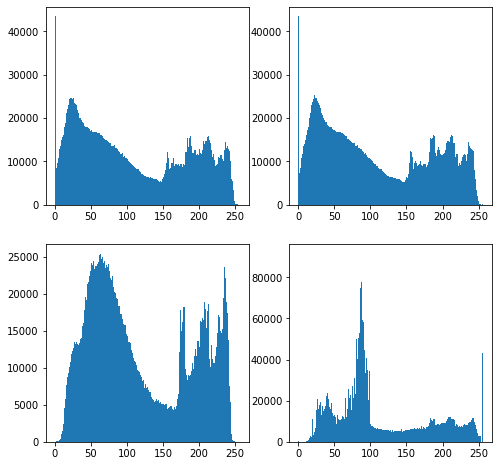

In [ ]:
fig = plt.figure(num=None, figsize=(8, 8))

ax = fig.add_subplot(2, 2, 1)
plt.hist(img.ravel(), 256, [0, 256])

ax = fig.add_subplot(2, 2, 2)
plt.hist(img_rgb.ravel(), 256, [0, 256])

ax = fig.add_subplot(2, 2, 3)
plt.hist(img_graysclae.ravel(), 256, [0, 256])

ax = fig.add_subplot(2, 2, 4)
plt.hist(img_hsv.ravel(), 256, [0, 256])
plt.show()

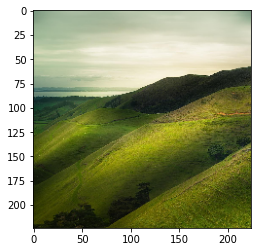

In [ ]:
img_resize = cv2.resize(img_rgb, (224, 224))
plt.imshow(img_resize)

In [ ]:
base_directory = '/content/'
augmented_directory = os.path.join(base_directory, 'augmented_result')
os.mkdir(augmented_directory)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.5,
    
)

In [ ]:
!mkdir test


In [ ]:
path = '/content'
size = 150
dataset = []
image_dir = os.listdir(path)

img2 = io.imread(f"{path}/{image_dir[4]}")
img2 = Image.fromarray(img2,  'RGB')
img2 = img2.resize((size, size))

dataset.append(np.array(img2))

x = np.array(dataset)

In [ ]:
i = 0 
for j in datagen.flow(x, batch_size=32,
                      save_to_dir='/content/augmented_result/',
                      save_prefix='aug_rslt',
                      save_format='png'):
  i += 1
  if i > 30:
    break

In [ ]:
img3 = cv2.GaussianBlur(img_rgb, (3, 3), 0)
rgb_dst = cv2.fastNlMeansDenoisingColored(img3, None, 10, 10, 7, 15)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fedb514df10>,
 <matplotlib.image.AxesImage at 0x7fedb5639e90>)

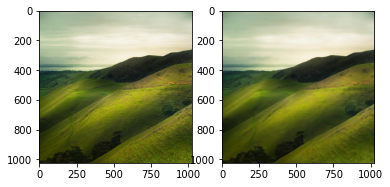

In [ ]:
plt.subplot(121),plt.imshow(img_rgb)
plt.subplot(122),plt.imshow(rgb_dst)